## Importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#Class for handling winding grid worlds and its variations

In [2]:
class WindyGridWorld(object):
    #initialization
    def __init__(self, epsilon, alpha, wind, actions, rowMax, colMax, start, end, updateRule, stepReward, 
                 stochasticWind):
        self.epsilon = epsilon
        self.alpha = alpha
        self.wind = wind
        self.actions = actions
        self.rowMax = rowMax
        self.colMax = colMax
        self.Q = np.zeros((rowMax+1, colMax+1, len(actions)))
        self.start = start
        self.end = end
        self.updateRule = updateRule
        self.stepReward = stepReward
        self.stochasticWind = stochasticWind
    #When states go out of the bound
    def clip(self, a, b, maxA, minA, maxB, minB):
        return np.maximum(np.minimum(a, maxA), minA), np.maximum(np.minimum(b, maxB), minB)
    #Determing the wind speed
    def determiningWind(self, s):
        if self.stochasticWind:
            if self.wind[s[1]]:
                return np.random.choice([self.wind[s[1]]-1, self.wind[s[1]], self.wind[s[1]]+1])
            else:
                return 0
        else:
            return self.wind[s[1]]
            
    #Determing the next states
    def nextState(self, s, a):
        a = self.actions[a]
        w = self.determiningWind(s)
        new_s = (s[0]+a[0]-w, s[1]+a[1]) 
        return self.clip(new_s[0], new_s[1], self.rowMax, 0, self.colMax, 0)
    #An epsilon greedy policy for next state selection
    def epsilonGreedy(self, s):
        if self.epsilon < np.random.ranf():
            return np.argmax(self.Q[s[0], s[1]])
        else:
            return np.random.randint(0,len(self.actions)) 

    # One Episode
    def oneEpisode(self):
        s = self.start
        a = self.epsilonGreedy(s)
        newS = self.nextState(s, a)
        newA = self.epsilonGreedy(newS)
        self.updateQ(s, a, newS, newA)
        episodeSteps = 1
        while newS != self.end:            
            s = newS
            a = newA
            newS = self.nextState(s, a)
            newA = self.epsilonGreedy(newS)
            self.updateQ(s, a, newS, newA)
            episodeSteps += 1
        return episodeSteps
    
    def updateQ(self, s, a, newS, newA):
        if self.updateRule == 'sarsa':
            self.Q[s[0], s[1], a] += alpha*(self.stepReward + self.Q[newS[0], newS[1], newA] - 
                                            self.Q[s[0], s[1], a])
        elif self.updateRule == 'Q-learning':
            self.Q[s[0], s[1], a] += alpha*(self.stepReward + np.max(self.Q[newS[0], newS[1]]) -
                                            self.Q[s[0], s[1], a])
    def multiEpisodes(self, n):
        t = []
        for episodeNumber in range(n):
            episodeSteps = self.oneEpisode()
            t.extend([episodeNumber]*episodeSteps)
        #print t
        plt.plot(t, label = self.updateRule)
        plt.xlabel('Time steps')
        plt.ylabel('Episodes')
 


#Winding Grid Word with 4 actions

In [3]:
# epsilon, alpha, wind, actions, rowMax, colMax, start, end, updateRule, stepReward, stochasticWind
epsilon = 0.1
alpha = 0.1
wind = [0,0,0,1,1,1,2,2,1,0]
rowMax = 6
colMax = 9
start = (3,0)
end = (3,7)
updateRule = 'sarsa'
stepReward = -1
stochasticWind = False
actions = [(1,0), (-1,0), (0,1), (0,-1)] ##(up, down, right, left)
windyGridWorld = WindyGridWorld(epsilon, alpha, wind, actions, rowMax, colMax, start, end, updateRule, 
                                stepReward, stochasticWind )

#Winding Grid Word With Kings move

In [4]:
# epsilon, alpha, wind, actions, rowMax, colMax, start, end, updateRule, stepReward
actionsKing = [(1,0), (-1,0), (0,1), (0,-1), (1,1), (1,-1), (-1,1), (-1,-1)] 
"""(up, down, right, left, main_diagonal_up, main_diagonal_down, seondary_diagonal_up, secondary_diagonal_down ) """
windyGridWorldKingsmove = (
    WindyGridWorld(epsilon, alpha, wind, actionsKing, rowMax, colMax, start, end, updateRule, stepReward, 
                   stochasticWind ))

## Kings move with the idle actions

In [5]:
actionsKingIdle = [(1,0), (-1,0), (0,1), (0,-1), (1,1), (1,-1), (-1,1), (-1,-1), (0,0)] 
"""(up, down, right, left, main_diagonal_up, main_diagonal_down, seondary_diagonal_up, 
secondary_diagonal_down, idle ) """
windyGridWorldKingsmoveIdle = (
    WindyGridWorld(epsilon, alpha, wind, actionsKingIdle, rowMax, colMax, start, end, updateRule, stepReward,
                  stochasticWind))

## Comparison of three grid words

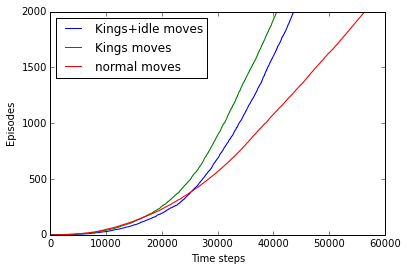

In [6]:
windyGridWorldKingsmoveIdle.multiEpisodes(2000)
windyGridWorldKingsmove.multiEpisodes(2000)
windyGridWorld.multiEpisodes(2000)
plt.legend(['Kings+idle moves', 'Kings moves', 'normal moves'], loc = 'upper left')

### From the above graph, we can see that King's move is performing better than both Kings+Idle and normal moves. 

1. Adding extra 4 moves after the normal moves are reducing the times steps requires for reaching the terminal state.
2. Adding one extra move to kings move is not doing any good but doing bad because of the epsilon greedy policy.

## Stochastic Winds

In [7]:
stochasticWind = True

In [8]:
windyGridWorld = WindyGridWorld(epsilon, alpha, wind, actions, rowMax, colMax, start, end, updateRule, stepReward,
                               stochasticWind)
windyGridWorldKingsmove = (
    WindyGridWorld(epsilon, alpha, wind, actionsKing, rowMax, colMax, start, end, updateRule, stepReward,
                  stochasticWind))
windyGridWorldKingsmoveIdle = (
    WindyGridWorld(epsilon, alpha, wind, actionsKingIdle, rowMax, colMax, start, end, updateRule, stepReward, 
                   stochasticWind ))

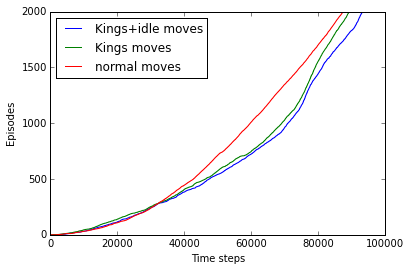

In [9]:
windyGridWorldKingsmoveIdle.multiEpisodes(2000)
windyGridWorldKingsmove.multiEpisodes(2000)
windyGridWorld.multiEpisodes(2000)
plt.legend(['Kings+idle moves', 'Kings moves', 'normal moves'], loc = 'upper left')

In [10]:
np.argmax(windyGridWorldKingsmove.Q, axis=2) # down, up, right, left

array([[1, 7, 4, 7, 2, 4, 2, 2, 6, 0],
       [2, 0, 0, 3, 0, 2, 3, 4, 4, 4],
       [7, 5, 5, 1, 0, 4, 5, 4, 4, 4],
       [4, 2, 2, 5, 1, 4, 4, 0, 2, 5],
       [6, 4, 4, 1, 4, 4, 0, 0, 5, 3],
       [1, 4, 4, 0, 4, 4, 4, 0, 4, 5],
       [4, 3, 4, 4, 4, 4, 2, 5, 7, 1]])

In [12]:
class CliffWalking(object):
    #initialization
    def __init__(self, epsilon, alpha, cliff, actions, rowMax, colMax, start, end, updateRule, stepReward, 
                 fallingPunishment):
        self.epsilon = epsilon
        self.alpha = alpha
        self.cliff = cliff
        self.actions = actions
        self.rowMax = rowMax
        self.colMax = colMax
        self.Q = np.zeros((rowMax+1, colMax+1, len(actions)))
        self.start = start
        self.end = end
        self.updateRule = updateRule
        self.stepReward = stepReward
        self.fallingPunishment = fallingPunishment
    #When states go out of the bound
    def clip(self, a, b, maxA, minA, maxB, minB):
        return np.maximum(np.minimum(a, maxA), minA), np.maximum(np.minimum(b, maxB), minB)
    #Determing the wind speed
    def determiningReward(self, s):
        if s in self.cliff:
            return self.fallingPunishment
        else:
            return self.stepReward
            
    #Determing the next states
    def nextState(self, s, a):
        a = self.actions[a]
        new_s = (s[0]+a[0], s[1]+a[1]) 
        return self.clip(new_s[0], new_s[1], self.rowMax, 0, self.colMax, 0)
    #An epsilon greedy policy for next state selection
    def epsilonGreedy(self, s):
        if self.epsilon < np.random.ranf():
            return np.argmax(self.Q[s[0], s[1]])
        else:
            return np.random.randint(0,len(self.actions)) 
    # One Episode
    def oneEpisode(self):
        s = self.start
        a = self.epsilonGreedy(s)
        newS = self.nextState(s, a)
        #print s,a,newS
        episodeReward = self.determiningReward(newS)
        newA = self.epsilonGreedy(newS)
        #print s, a, newS, newA
        self.updateQ(s, a, newS, newA)
        while newS != self.end and newS not in self.cliff:
            s = newS
            a = newA
            newS = self.nextState(s, a)
            newA = self.epsilonGreedy(newS)
            #print s, a, newS, newA
            self.updateQ(s, a, newS, newA)
            episodeReward += self.determiningReward(newS)
        return episodeReward
    
    def updateQ(self, s, a, newS, newA):
        if self.updateRule == 'sarsa':
            self.Q[s[0], s[1], a] += alpha*(self.determiningReward(newS) + self.Q[newS[0], newS[1], newA] - 
                                            self.Q[s[0], s[1], a])
        elif self.updateRule == 'Q-learning':
            self.Q[s[0], s[1], a] += alpha*(self.determiningReward(newS) + np.max(self.Q[newS[0], newS[1]]) -
                                            self.Q[s[0], s[1], a])
    def multiEpisodes(self, n):
        t = []
        for episodeNumber in range(n):
            episodeReward = self.oneEpisode()
            t.append(episodeReward)
            #print 'episodeReward', episodeReward
        plt.plot(t, label = self.updateRule)
        plt.xlabel('Episodes')
        plt.ylabel('Reward')
 


In [13]:
##epsilon, alpha, cliff, actions, rowMax, colMax, start, end, updateRule, stepReward, fallingPunishment
epsilon = 0.1
alpha = 0.1
stepReward = -1
actions = [(1,0), (-1,0), (0,1), (0,-1)] ##(up, down, right, left)
rowMaxCliff = 3
colMaxCliff = 11
endCliff = (0, colMaxCliff)
startCliff = (0,0)
updateRule = 'sarsa'
fallingPunishment = -100
cliff = zip([0]*(colMaxCliff-1), range(1, colMaxCliff))
cliffWalkingSarsa = CliffWalking(epsilon, alpha, cliff, actions, rowMaxCliff, colMaxCliff, 
                            startCliff, endCliff, 'sarsa', stepReward, fallingPunishment)
cliffWalkingQ = CliffWalking(epsilon, alpha, cliff, actions, rowMaxCliff, colMaxCliff, 
                            startCliff, endCliff, 'Q-learning', stepReward, fallingPunishment)

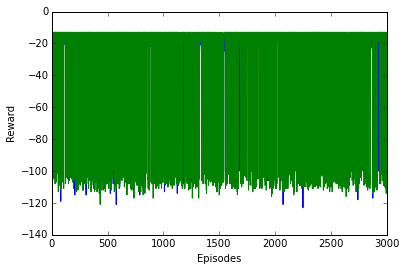

In [16]:
cliffWalkingSarsa.multiEpisodes(3000)
cliffWalkingQ.multiEpisodes(3000)

In [19]:
print 'path of Sarsa\n', cliffWalkingSarsa.Q.argmax(axis=2)
print 'path of Q-learning\n', cliffWalkingQ.Q.argmax(axis=2)
print 'Actions', actions

 path of Sarsa
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 2 2 0 0 2 1]
 [2 2 2 2 2 2 2 2 2 2 2 1]
 [2 2 2 2 2 2 2 2 2 2 2 1]]
path of Q-learning
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2 2 1]
 [2 2 2 2 2 2 1 2 2 1 1 1]
 [0 0 2 3 2 2 1 2 2 2 2 1]]
Actions [(1, 0), (-1, 0), (0, 1), (0, -1)]


Q. Why does Q-learning take optimal routes and SARSA take safer route?